In [1]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from distutils.version import LooseVersion
import pandas_profiling
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


from sklearn.datasets import load_boston
from sklearn.preprocessing import QuantileTransformer, quantile_transform

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score, mean_absolute_error, mean_squared_error


import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

In [2]:
_path = r"C:\Users\ATUL\Downloads\Compressed\allstate-claims-severity"
dataset = pd.read_csv(_path+r"\train.csv")
dataset.shape

(188318, 132)

In [3]:
total = dataset.isnull().sum().sort_values(ascending = False)
percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
loss,0,0.0
cat48,0,0.0
cat34,0,0.0
cat35,0,0.0
cat36,0,0.0


In [4]:
cat_col = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 
 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29',
 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 
 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 
 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 
 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 
 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 
 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat111', 'cat112', 'cat113', 
 'cat114', 'cat115', 'cat110', 'cat116', 'cat109']

num_col = ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
          'cont13', 'cont14', 'loss']

target = 'loss'

In [5]:
dataset.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [6]:
iqr = 3865-1205
lower = 1205 - 1.5*iqr
upper = 3865 + 1.5*iqr

print(lower, upper)
std3 = 3*2905
print(3038-std3, 3038+std3)

-2785.0 7855.0
-5677 11753


In [7]:
dataset = dataset[dataset.loss <= 12000]
dataset.shape

(185059, 132)

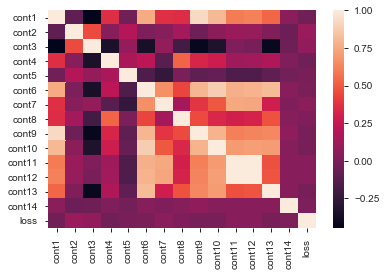

In [8]:
#pandas_profiling.ProfileReport(dataset)
sns.heatmap(dataset[num_col].corr(), xticklabels=dataset[num_col].columns.values, yticklabels=dataset[num_col].columns.values)

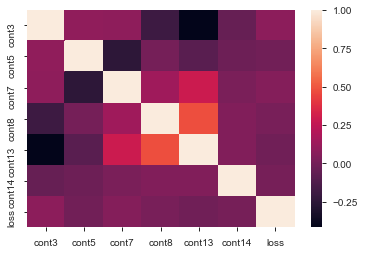

In [9]:
#nnum_col = ['cont2', 'cont3', 'cont5', 'cont7', 'cont8', 'cont13', 'cont14', 'loss']
nnum_col = ['cont1','cont3' ,'cont5', 'cont7', 'cont8','cont13' ,'cont14','cont10', 'loss']
sns.heatmap(dataset[nnum_col].corr(), xticklabels=dataset[nnum_col].columns.values, yticklabels=dataset[nnum_col].columns.values)

In [10]:
import sys
import numpy as np
import pandas as pd
#import pandas_profiling
import sklearn
import seaborn as sns; 
from IPython.display import Markdown, display
import matplotlib.pyplot as plt;
from dateutil.parser import parse
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2,f_classif
import sklearn.preprocessing;
import warnings

warnings.filterwarnings("ignore")
np.seterr(divide='ignore', invalid='ignore')


class Profiling:

    def __init__(self, input_df,categorical_cols=[],numerical_cols=[],target_col="Failure Flag",check_date_cols=False
                ,date_format='\d{4}-\d{2}-\d{2} \d{2}\:\d{2}\:\d{2}',nunique_count=20,min_count=500,k_cat=15,k_num=15
                ,pre_process=True,apply_filter=True,cat_data_types=['object']):
        self.df = input_df # pd.read_csv(data_file_path)
        self.df_asis=self.df.copy()
        
        #path of data file
        #self.file_path=file_path
        
        #list of categorical columns identified as predictor
        self.categorical_cols=categorical_cols
        
        #list of numerical columns identified as predictor
        self.numerical_cols=numerical_cols
        
        #name of target variable
        self.target=target_col
        
        #check for date column
        self.check_date_cols=check_date_cols
       
        #format for identifying date columns
        self.date_format=date_format
        
        #criteria for categorical column
        #categorical if count of unique is < nunique_count and min number of records >= min_count
        self.nunique_count=nunique_count
        self.min_count=min_count
    
        #top K features
        #count of categorical features from SelectKBest
        self.k_cat=k_cat
        #count of numeric features from SelectKBest
        self.k_num=k_num
        
        #datatypes to consider for categorical values
        self.cat_data_types=cat_data_types
        
        self.pre_process=pre_process
        
        self.apply_filter=apply_filter
    
    def printmd(self, string):
        display(Markdown(string))
    
    def printmd(self, string, color=None):
        colorstr = "<span style='color:{}'>{}</span>".format(color, string)
        display(Markdown(colorstr))
        
    def impute_data_with_default(self, imp_data, cat_list, num_list):
        #"""
        imp_data = imp_data.assign(
                    **{col: imp_data[col].replace(np.nan, "UNSPECIFIED")
                       for col in cat_list}) 
       
        _min_ = -sys.maxsize -1
        imp_data = imp_data.assign(
                    **{col: imp_data[col].fillna(_min_)
                       for col in num_list})
        return imp_data

    def all_low_cardinality_to_categorical(self):
        df_to_use = self.df.copy()
        s_nunique = df_to_use.select_dtypes(include=self.cat_data_types).nunique()
        s_tot = df_to_use.select_dtypes(include=self.cat_data_types).count()
        frame = { 's_nunique': s_nunique, 's_tot': s_tot } 
        df_nunique = pd.DataFrame(frame)
       
        transform_fn = lambda x: x.astype("category")
        df_to_use = df_to_use.assign(
                **{col: transform_fn(df_to_use[col])
                   for col in df_nunique[(df_nunique['s_nunique'] < self.nunique_count) & (df_nunique['s_tot'] > self.min_count)].index})       
        return (df_to_use)

    
    def find_date(self, date_format):
        date_list = []
        if date_format != '':
            for column1 in self.df.select_dtypes(include='object'):
                if self.df[column1].astype(str).str.match(r'\d{4}-\d{2}-\d{2} \d{2}\:\d{2}\:\d{2}').all():
                    #df[column1] = pd.to_datetime(df[column1])
                    #df['month'] = df[column1].dt.month
                    #df['quarter'] = df[column1].dt.quarter
                    #df['year'] = df[column1].dt.year
                    date_list.append(column1)
        else:
            for column1 in self.df.select_dtypes(include='object'):
                try: 
                    self.df[column1].apply(lambda x: parse(x, fuzzy=False)) 
                    date_list.append(column1)
                except:
                    date_list=date_list
        return date_list

    def cramers_v_bias(self,x, y):
        df_crosstab = pd.crosstab(x,y)
        chi2 = chi2_contingency(df_crosstab)[0]
        n = df_crosstab.sum().sum()
        phi2 = chi2/n
        r,k = df_crosstab.shape
        phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
        rcorr = r-((r-1)**2)/(n-1)
        kcorr = k-((k-1)**2)/(n-1)
        return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    
    def cat_correlation(self,data, cat_list):
        df=data.copy()
        #X = df.select_dtypes(include=['category'])
        X = df[cat_list]

        df_corr = pd.DataFrame(0,index=X.columns, columns=X.columns)
        # encode categorical values as numbers
        
        #get correlation stats for each pair of categorical column
        for column1 in X.columns:
            for column2 in X.columns:
                cval=self.cramers_v_bias(X[column1],X[column2])
                df_corr.loc[column1,column2]=cval
        fig, ax = plt.subplots(figsize=(15,10))
        ax=sns.heatmap(df_corr, annot=True,fmt='.2f',annot_kws={"size":10})
        plt.show()
        plt.pause(0.05)
        """
        #cat_cols = df.select_dtypes(include=['category'])
        cat_cols = df[cat_list]
        cat_cols = cat_cols.loc[:,cat_cols.columns !=self.target]
        loc=0
        for column1 in cat_cols.columns:
            
            # Dist Plot
            self.printmd("**------------------------ Processing: - "+column1+ " ------------------------**", color='blue')
            dist_df = pd.crosstab(data[column1], data[self.target], normalize='index')
            display(dist_df)
            plt.pause(0.05)
            
            # Bar Plot
            width_size = data[column1].nunique()
            f, axes = plt.subplots(ncols=1,figsize=(1.5*width_size, 6))
            a0 = sns.countplot(x=column1, hue=self.target, data=data)
            a0.set_title(column1)
            plt.pause(0.05)
            
        """
    
    def numeric_correlation(self,input_data, cat_list, num_list):
        df=input_data.copy()
        #cat_cols = df.select_dtypes(include=['category'])
        #n_cols = df.select_dtypes(include=['int64','float64'])
        
        cat_cols = df[cat_list]
        n_cols = df[num_list]

        data = df.copy()
        data[self.target] = pd.Series(np.where(data[self.target] == 'Y', 1 , 0), data.index)
        data_yes = data[data[self.target] == 1]
        data_no = data[data[self.target] == 0]
        
        loc=0
        for column1 in n_cols.columns:
            self.printmd("**------------------------ Processing: - "+column1+ " ------------------------**", color='blue')
            # Box Plot
            df_n=df[column1]
            df_show=pd.concat([cat_cols, df[column1]], axis=1)
            
            ax = sns.boxplot(x=self.target, y=column1, data=df_show)
            medians = df_show.groupby([self.target])[column1].median().values
            nobs = df_show[self.target].value_counts().values
            nobs = [str(x) for x in nobs.tolist()]
            nobs = ["n: " + i for i in nobs]
            
            pos = range(len(nobs))
            for tick,label in zip(pos,ax.get_xticklabels()):
                ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
                horizontalalignment='center', size='small', color='w', weight='bold')
        
            plt.yscale('symlog')
            plt.autoscale(enable=True, axis='y')
            plt.show()
            plt.pause(0.05)
            
            # Dist Plot
            sns.distplot(data_yes[column1], label='0')
            sns.distplot(data_no[column1], label='1')
            plt.legend(title=self.target, loc='best')
            plt.figure(figsize=(12,5))
            plt.show()
            plt.pause(0.05)
    
    def SelectKBest_CR(self,data,cat_list,num_list):
        df=data.copy()
        df_num= df[df.columns.intersection(num_list)]
        df_cat= df[df.columns.intersection(cat_list)]
        
        df_cat= df_cat.loc[:, df_cat.columns != self.target]
        df_tar =  df[[self.target]]
        
        for column in df_cat.columns:
            le = LabelEncoder()
            #print(df_cat[column].nunique())
            df_cat[column] = le.fit_transform(df_cat[column])
        
        # 10 categorical features selectedusing chi2
        chi2_features = SelectKBest(chi2, k = self.k_cat).fit(np.array(df_cat), np.array(df_tar)) 

        for column in df_tar.columns:
            le = LabelEncoder()
            df_tar[column] = le.fit_transform(df_tar[column])
        
        # 20 tot features selectedusing f_classif
        f_classif_features = SelectKBest(f_classif, k = self.k_num).fit(np.array(df_num), np.array(df_tar)) 

        chi2_name=df_cat.columns
        f_classif_name=df_num.columns
        cat_feature_list=[]
        num_feature_list=[]
        outcome_chi2 = chi2_features.get_support()
        for i in range(0,len(chi2_name)):
            if outcome_chi2[i]:
                cat_feature_list.append(chi2_name[i])
        
        outcome_f_classif = f_classif_features.get_support()
        for i in range(0,len(f_classif_name)):
            if outcome_f_classif[i]:
                num_feature_list.append(f_classif_name[i])
        return(cat_feature_list,num_feature_list)
    
    def run_profile(self):
        self.printmd("**<font size='6'><center>Data Profiling</center></font>**", color=None)
        
        df_new=pd.DataFrame()
        df_new=self.all_low_cardinality_to_categorical()
        
        icat_list=list(df_new.select_dtypes(include=['category']).columns)
        inum_list=list(df_new.select_dtypes(include=['int64','float64']).columns)
        iothers_list=list(set(self.df_asis.columns) - set(icat_list) - set(inum_list))
        idate_list=self.find_date(date_format='\d{4}-\d{2}-\d{2} \d{2}\:\d{2}\:\d{2}')
        
        self.printmd("**<font size='4'><u>Get Categorical-Numerical Variables List: </u></font>**", color=None)
        
        self.printmd("**<font size='2'>Provided Categorical columns: <br></font>**"+str(self.categorical_cols)+"")
        self.printmd("**<font size='2'>Provided Numeric columns: <br></font>**"+str(self.numerical_cols)+"")
        
        self.printmd("**<font size='2'>Categorical colums identified: <br></font>**"+str(icat_list)+"")
        self.printmd("**<font size='2'>Numeric columns identified: <br></font>**"+str(inum_list)+"")
        self.printmd("**<font size='2'>Other object columns: <br></font>**"+str(iothers_list)+"")
        self.printmd("<br><br><br><br>")
        plt.pause(0.05)
        
        cat_list = []
        num_list = []
        if(len(self.categorical_cols) != 0):
            cat_list = self.categorical_cols
        else:
            cat_list = icat_list
            
        if(len(self.numerical_cols) != 0):
            num_list = self.numerical_cols
        else:
            num_list = inum_list
        
        """
        self.printmd("**<font size='4'><u>Missing values Imputation:</u></font>**", color=None)
        self.printmd("<font size='2'>Categorical with **UNSPECIFIED** & Numerival Variables with **INT-MIN**</font>", color='blue')
        df_new = self.impute_data_with_default(df_new, cat_list, num_list)
        self.printmd("<br><br><br><br>")
        plt.pause(0.05)
        
        
        cat_feature_list,num_feature_list =self.SelectKBest_CR(data=df_new,cat_list=cat_list,num_list=num_list)
        plt.pause(0.05)
        
        
        self.printmd("**<font size='4'><u>Categorical Variables Analysis: </u></font>**", color=None)
        self.printmd("**<font size='2'>Top "+str(self.k_cat)+" Categorical features by SelectKBest using chi2:<br></font>**"+str(cat_feature_list)+"")
        self.printmd("<br>")
        plt.pause(0.05)
        """
        
        self.printmd("**<font size='2'>Categorical Variables Correlation-Plot: <br></font>**")
        self.cat_correlation(df_new, cat_list)
        self.printmd("<br><br><br><br>")
        plt.pause(0.05)
        
        """
        self.printmd("**<font size='4'><u>Numerical Variables Analysis: </u></font>**", color=None)
        self.printmd("**<font size='2'>Top "+str(self.k_num)+" Numeric features by SelectKBest using f_classif (ANOVA F)::<br></font>**"+str(num_feature_list)+"")
        self.printmd("<br>")
        plt.pause(0.05)
        self.numeric_correlation(df_new, cat_list, num_list)
        self.printmd("<br><br><br><br>")
        plt.pause(0.05)
        
        profile = pandas_profiling.ProfileReport(df_new)
        display(profile)
        """
        
        self.printmd("<br><br><br><br>")
        plt.pause(0.05)

In [ ]:
#cat_col = []

In [ ]:
# Initialize by providing configuration for CR profiling
#profiling = Profiling(dataset[cat_col], categorical_cols= cat_col,numerical_cols=[],nunique_count=200,target_col="loss", k_cat=20,k_num=10)
# Run the profile
#profiling.run_profile()

In [11]:
import sys
import numpy as np
import pandas as pd
#import pandas_profiling
import sklearn
import seaborn as sns; 
from IPython.display import Markdown, display
import matplotlib.pyplot as plt;
from dateutil.parser import parse
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2,f_classif
import sklearn.preprocessing;
import warnings

In [13]:
df_tar = dataset[cat_col]
df_num = dataset[['loss']]
    
for column in df_tar.columns:
    le = LabelEncoder()
    df_tar[column] = le.fit_transform(df_tar[column])

# 20 tot features selectedusing f_classif

f_classif_features = SelectKBest(f_regression, k = 65).fit(np.array(df_tar), np.array(df_num)) 

f_classif_name=df_tar.columns
num_feature_list=[]

outcome_f_classif = f_classif_features.get_support()
for i in range(0,len(f_classif_name)):
    if outcome_f_classif[i]:
        num_feature_list.append(f_classif_name[i])
        
sel_cat_col = np.array(num_feature_list).reshape(65,)
print(sel_cat_col)

['cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9' 'cat10'
 'cat11' 'cat12' 'cat13' 'cat14' 'cat16' 'cat17' 'cat18' 'cat19' 'cat20'
 'cat23' 'cat24' 'cat25' 'cat26' 'cat28' 'cat29' 'cat30' 'cat32' 'cat33'
 'cat34' 'cat35' 'cat36' 'cat38' 'cat39' 'cat40' 'cat41' 'cat43' 'cat44'
 'cat45' 'cat46' 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53'
 'cat57' 'cat58' 'cat59' 'cat61' 'cat65' 'cat66' 'cat67' 'cat71' 'cat72'
 'cat73' 'cat74' 'cat75' 'cat76' 'cat78' 'cat79' 'cat80' 'cat81' 'cat82'
 'cat83' 'cat84' 'cat85' 'cat87' 'cat89' 'cat90' 'cat91' 'cat94' 'cat95'
 'cat98' 'cat99' 'cat100' 'cat101' 'cat102' 'cat103' 'cat105' 'cat106'
 'cat111' 'cat112' 'cat113' 'cat114']


<span style='color:None'>**<font size='6'><center>Data Profiling</center></font>**</span>

<span style='color:None'>**<font size='4'><u>Get Categorical-Numerical Variables List: </u></font>**</span>

<span style='color:None'>**<font size='2'>Provided Categorical columns: <br></font>**['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat23', 'cat24', 'cat25', 'cat26', 'cat28', 'cat29', 'cat30', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat38', 'cat39', 'cat40', 'cat41', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat57', 'cat58', 'cat59', 'cat61', 'cat65', 'cat66', 'cat67', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat87', 'cat89', 'cat90', 'cat91', 'cat94', 'cat95', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat105', 'cat106', 'cat111', 'cat112', 'cat113', 'cat114']</span>

<span style='color:None'>**<font size='2'>Provided Numeric columns: <br></font>**[]</span>

<span style='color:None'>**<font size='2'>Categorical colums identified: <br></font>**['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat23', 'cat24', 'cat25', 'cat26', 'cat28', 'cat29', 'cat30', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat38', 'cat39', 'cat40', 'cat41', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat57', 'cat58', 'cat59', 'cat61', 'cat65', 'cat66', 'cat67', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat87', 'cat89', 'cat90', 'cat91', 'cat94', 'cat95', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat105', 'cat106', 'cat111', 'cat112', 'cat113', 'cat114']</span>

<span style='color:None'>**<font size='2'>Numeric columns identified: <br></font>**[]</span>

<span style='color:None'>**<font size='2'>Other object columns: <br></font>**[]</span>

<span style='color:None'><br><br><br><br></span>

<span style='color:None'>**<font size='2'>Categorical Variables Correlation-Plot: <br></font>**</span>

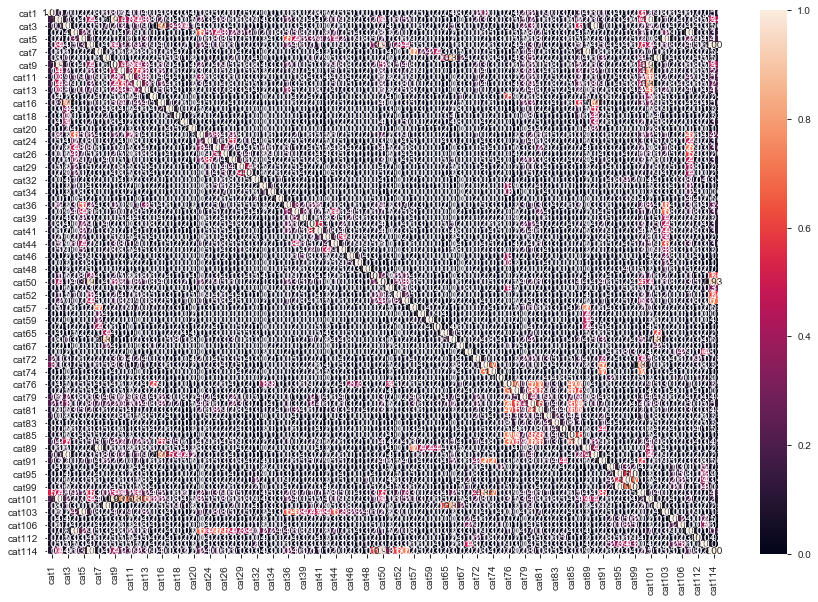

<span style='color:None'><br><br><br><br></span>

<span style='color:None'><br><br><br><br></span>

In [14]:
# Initialize by providing configuration for CR profiling
#import profiling
profiling = Profiling(dataset[num_feature_list], categorical_cols= num_feature_list, numerical_cols=[],nunique_count=200,target_col="loss", k_cat=20,k_num=10)
# Run the profile
profiling.run_profile()

In [15]:
#corr_cat_col = ['cat10', 'cat11', 'cat12', 'cat3', 'cat16', 'cat24', 'cat36', 'cat50', 'cat57', 'cat78','cat87','cat82'
# 'cat89', 'cat90', 'cat94', 'cat103', 'cat101', 'cat111', 'cat102','cat114','cat52']

corr_cat_col = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
                'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14',
                'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat23', 
                'cat24', 'cat25', 'cat26', 'cat28', 'cat29', 'cat30', 'cat32',
                'cat33', 'cat34', 'cat35', 'cat36', 'cat38', 'cat39', 'cat40',
                'cat41', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 
                'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat57', 'cat58', 'cat59',
                'cat61', 'cat65', 'cat66', 'cat67', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 
                'cat76', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat87',
                'cat89', 'cat90', 'cat91', 'cat94', 'cat95', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 
                'cat103', 'cat105', 'cat106', 'cat111', 'cat112', 'cat113', 'cat114']

In [16]:
ncat_col = list(set(num_feature_list) - set(corr_cat_col))
print(len(ncat_col), ncat_col)


0 []


In [17]:
target_col = 'loss'
feat_col = nnum_col

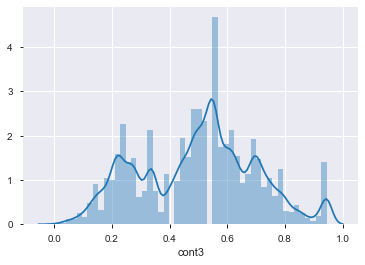

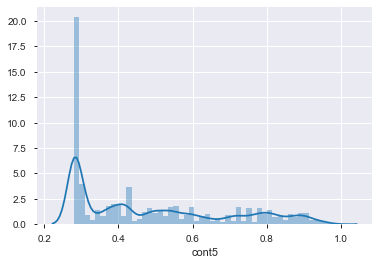

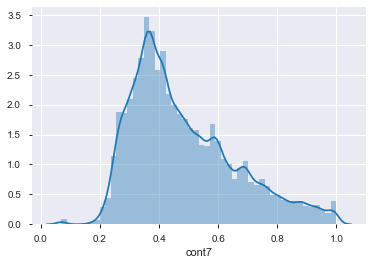

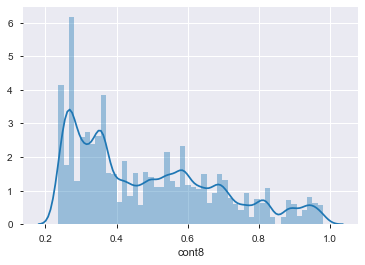

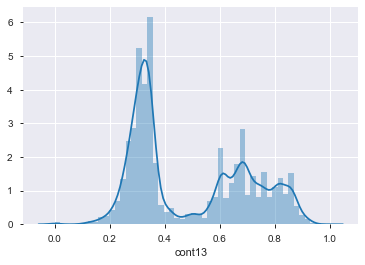

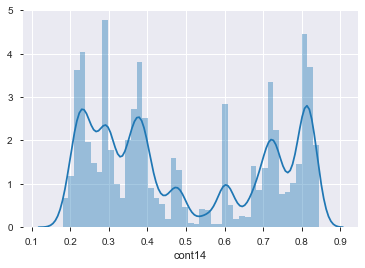

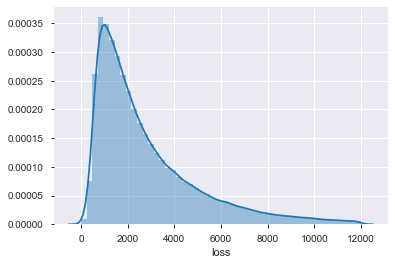

In [18]:
for ncol in feat_col:
    X=dataset[ncol]
    #display(sns.distplot(X))
    sns.distplot(X)
    plt.show()
    plt.pause(0.05)

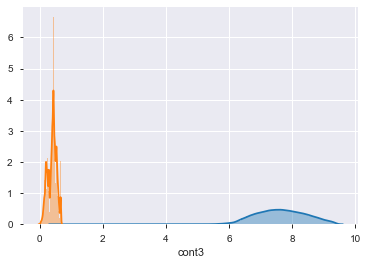

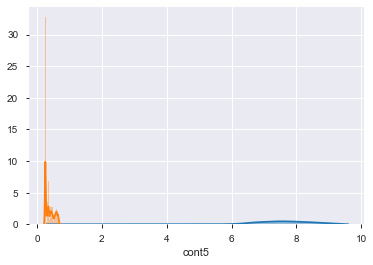

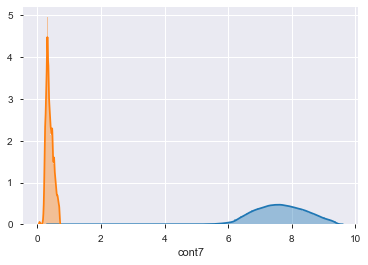

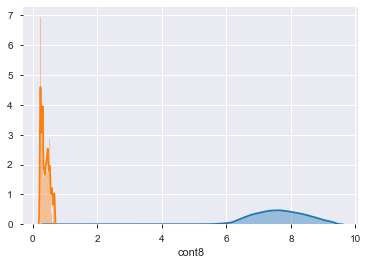

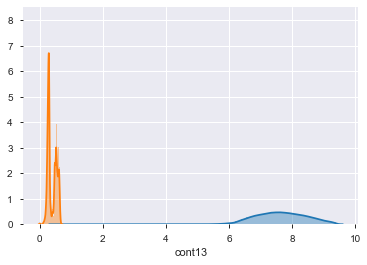

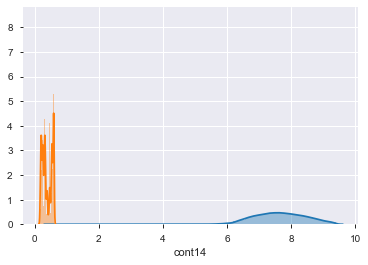

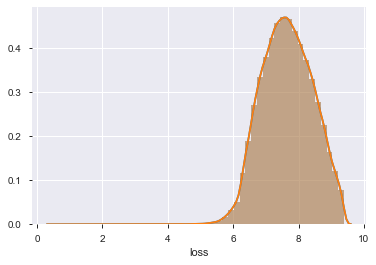

In [19]:
for ncol in feat_col:
    X=np.log1p(dataset[target_col])
    y=np.log1p(dataset[ncol])
    #X = dataset[target_col]
    #y = dataset[ncol]
    sns.distplot(X)
    sns.distplot(y)
    plt.show()
    plt.pause(0.05)


In [20]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(123)

In [40]:
#0, 1, 2, 3, 4 = log

In [21]:
X = np.log1p(dataset[feat_col[1]])
y = np.log1p(dataset[target_col])
print(np.corrcoef(X,y))

model = sm.OLS(X, y)
results = model.fit()
print(results.summary())


print('Parameters: ', results.params)
print('R2: ', results.rsquared)

print('Parameters: ', results.params)
print('Standard errors: ', results.bse)
print('Predicted values: ', results.predict())
print(len(y), len(results.predict()))

[[ 1.         -0.01149928]
 [-0.01149928  1.        ]]
                                 OLS Regression Results                                
Dep. Variable:                  cont5   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          1.371e+06
Date:                Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                        21:09:50   Log-Likelihood:                          99031.
No. Observations:              185059   AIC:                                 -1.981e+05
Df Residuals:                  185058   BIC:                                 -1.981e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.02

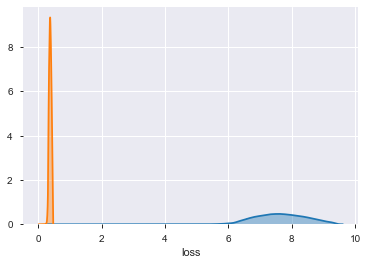

In [22]:
sns.distplot(y)
sns.distplot(results.predict())

In [68]:
# lf_ncat_col = ['cat75', 'cat24', 'cat28', 'cat80', 'cat7', 'cat2', 'cat1',
#             'cat4', 'cat6', 'cat72', 'cat3', 'cat9', 'cat40', 'cat87', 'cat65', 'cat14', 'cat45',
#             'cat5', 'cat81', 'cat85', 'cat73', 'cat38', 'cat17', 'cat79', 'cat82', 'cat29', 'cat8', 'cat25', 'cat41', 'cat71',
#             'cat76']

lf_ncat_col = corr_cat_col
total_col = nnum_col + lf_ncat_col
print(total_col)
total_test_col = ['cont3', 'cont5', 'cont7', 'cont8', 'cont13', 'cont14'] + lf_ncat_col

['cont3', 'cont5', 'cont7', 'cont8', 'cont13', 'cont14', 'loss', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat23', 'cat24', 'cat25', 'cat26', 'cat28', 'cat29', 'cat30', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat38', 'cat39', 'cat40', 'cat41', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat57', 'cat58', 'cat59', 'cat61', 'cat65', 'cat66', 'cat67', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat87', 'cat89', 'cat90', 'cat91', 'cat94', 'cat95', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat105', 'cat106', 'cat111', 'cat112', 'cat113', 'cat114']


# Data Filter

In [96]:
missing_cols = ['cat103', 'cat106', 'cat111', 'cat113', 'cat89', 'cat99','cat102', 'cat105','cat114','cat90']

In [100]:
lf_ncat_col = list(set(lf_ncat_col) - set(missing_cols))

In [101]:
total_test_col = list(set(total_test_col) - set(missing_cols))

total_col = list(set(total_col) - set(missing_cols))

In [122]:
dataset = pd.read_csv(_path+r"\train.csv").drop(missing_cols, axis = 1)
test_dataset = pd.read_csv(_path+r"\test.csv").drop(missing_cols, axis = 1)
print(dataset.shape)
print(test_dataset.shape)

trdataset = dataset[total_col].copy().drop(['cat101'], axis=1)
trdataset['ln_loss'] = np.log1p(trdataset['loss'])
trdataset['ln_cont3'] = np.log1p(trdataset['cont3'])
trdataset['ln_cont5'] = np.log1p(trdataset['cont5'])
trdataset['ln_cont7'] = np.log1p(trdataset['cont7'])
trdataset['ln_cont8'] = np.log1p(trdataset['cont8'])
trdataset['ln_cont13'] = np.log1p(trdataset['cont13']) 
trdataset['ln_cont14'] = np.log1p(trdataset['cont14'])

tsdataset = test_dataset[total_test_col].copy()
#tsdataset['ln_loss'] = np.log1p(tsdataset['loss'])
tsdataset['ln_cont3'] = np.log1p(tsdataset['cont3'])
tsdataset['ln_cont5'] = np.log1p(tsdataset['cont5'])
tsdataset['ln_cont7'] = np.log1p(tsdataset['cont7'])
tsdataset['ln_cont8'] = np.log1p(tsdataset['cont8'])
tsdataset['ln_cont13'] = np.log1p(tsdataset['cont13']) 
tsdataset['ln_cont14'] = np.log1p(tsdataset['cont14'])


(188318, 122)
(125546, 121)


In [123]:
#for c in ncat_col:
 #   print(c, trdataset[c].nunique())
    
trdataset = trdataset[trdataset.ln_loss >= 5.7]
trdataset.shape  

(187588, 88)

In [125]:
lf_ncat_col_tr = list(set(lf_ncat_col)-set(['cat101']))

In [126]:
train_dataset_onehot = trdataset.copy()
train_dataset_onehot = pd.get_dummies(trdataset, columns=lf_ncat_col_tr, prefix = lf_ncat_col_tr)

print(train_dataset_onehot.shape)

(187588, 263)


In [127]:
train_dataset_onehot.describe()

,cont7,cont8,cont14,cont13,loss,cont5,cont3,ln_loss,ln_cont3,ln_cont5,...,cat100_F,cat100_G,cat100_H,cat100_I,cat100_J,cat100_K,cat100_L,cat100_M,cat100_N,cat100_O
count,187588.000000,187588.000000,187588.000000,187588.000000,187588.000000,187588.000000,187588.000000,187588.000000,187588.000000,187588.000000,...,187588.000000,187588.000000,187588.000000,187588.000000,187588.000000,187588.000000,187588.000000,187588.000000,187588.000000,187588.000000
mean,0.485090,0.486484,0.495959,0.493149,3048.302666,0.487425,0.499117,7.695160,0.395583,0.387620,...,0.228261,0.068885,0.057392,0.211351,0.063751,0.073406,0.106291,0.027582,0.040248,0.030247
std,0.178520,0.199416,0.222567,0.212793,2904.393624,0.209037,0.202065,0.798510,0.137299,0.135736,...,0.419713,0.253259,0.232590,0.408268,0.244310,0.260802,0.308211,0.163772,0.196540,0.171267
min,0.069503,0.236880,0.179722,0.000228,298.280000,0.281143,0.002634,5.701380,0.002631,0.247753,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350175,0.312800,0.294610,0.315758,1212.910000,0.281143,0.336963,7.101602,0.290401,0.247753,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.438407,0.441060,0.408656,0.363547,2124.800000,0.422268,0.527991,7.661903,0.423954,0.352253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.591045,0.623580,0.724668,0.689974,3874.045000,0.635304,0.634224,8.262313,0.491168,0.491829,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.980200,0.844848,0.988494,121012.250000,0.983674,0.944251,11.703655,0.664877,0.684951,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
drop_col = ['ln_loss', 'loss', 'cont13', 'cont5', 'cont7', 'cont8', 'cont14']

In [129]:
X = train_dataset_onehot.drop(drop_col,axis=1)
y = train_dataset_onehot['ln_loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [130]:
nnum_col

['cont3', 'cont5', 'cont7', 'cont8', 'cont13', 'cont14', 'loss']

In [131]:
import operator

import numpy as np
import matplotlib.pyplot as plt

#from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


train_dataset_d = X_train
test_dataset_d = X_test

train_dataset_y = y_train
test_dataset_y = y_test

lr_model = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
lr_model.fit(train_dataset_d, train_dataset_y)
predictions_train = lr_model.predict(train_dataset_d)
predictions = lr_model.predict(test_dataset_d)

print("Train : ===================================>")
rmse_tr = np.sqrt(mean_squared_error(train_dataset_y,predictions_train))
r2_tr = r2_score(train_dataset_y, predictions_train) #, multioutput='variance_weighted'
mae_tr = median_absolute_error(train_dataset_y, predictions_train)
print('Score Train: %.4f' % lr_model.score(train_dataset_d, train_dataset_y))
print("RMSE Train: ",rmse_tr)
print("MAE Train: ",mae_tr)
print("R2 Score Train: ",r2_tr)

print("Test : ===================================>")
rmse_ts = np.sqrt(mean_squared_error(test_dataset_y,predictions))
r2_ts = r2_score(test_dataset_y, predictions) #, multioutput='variance_weighted'
mae_ts = median_absolute_error(test_dataset_y, predictions)
print('Score Test: %.4f' % lr_model.score(test_dataset_d, test_dataset_y))
print("RMSE Test: ",rmse_ts)
print("MAE Test: ",mae_ts)
print("R2 Score Test: ",r2_ts)

yt = test_dataset_y.values.reshape(1,-1)#.tolist()[0]
pr = predictions.reshape(1,-1)#.tolist()[0]
SS_Residual = np.sum((yt-pr)**2)
SS_Total = np.sum((yt-np.mean(yt))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(test_dataset_y.values.reshape(1,-1).tolist()[0])-1)/(len(test_dataset_y.values.reshape(1,-1).tolist()[0])-test_dataset_d.shape[1]-1)

print(r_squared, adjusted_r_squared)

Train : ===================================>
Score Train: 0.5071
RMSE Train:  0.5607755248855116
MAE Train:  0.37133430682189683
R2 Score Train:  0.5071280823398504
Test : ===================================>
Score Test: 0.5054
RMSE Test:  0.5611248584103365
MAE Test:  0.36962000621841007
R2 Score Test:  0.505410043018997
0.505410043018997 0.503149867564032


(56277, 2)


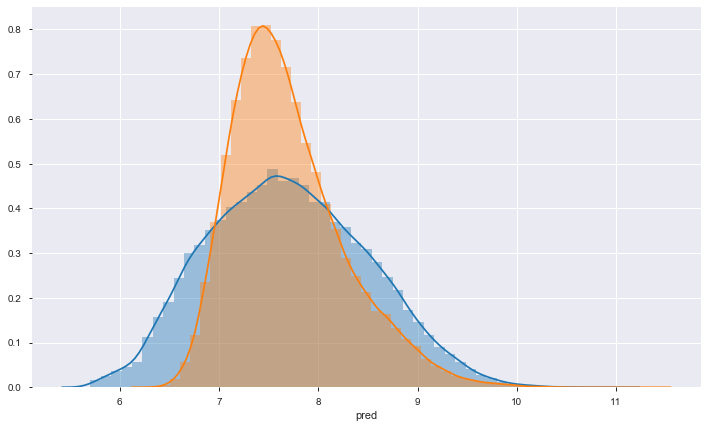

In [132]:
opDf = pd.DataFrame(np.array([test_dataset_y.values.reshape(1,-1).tolist()[0], predictions.reshape(1,-1).tolist()[0]]).T,
    columns=['act','pred'])
print(opDf.shape)
opDf
sns.distplot(opDf['act'])
sns.distplot(opDf['pred'])


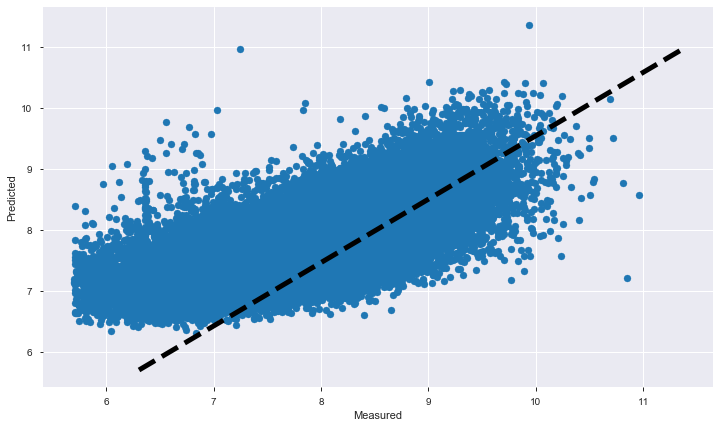

In [133]:
fig, ax = plt.subplots() 
ax.scatter(test_dataset_y, predictions) 
ax.plot([predictions.min(), predictions.max()], [test_dataset_y.min(), test_dataset_y.max()], 'k--', lw=5) 
ax.set_xlabel('Measured') 
ax.set_ylabel('Predicted') 
plt.show() 

In [145]:
tsdataset1 = tsdataset.copy()

tsdataset1_onehot = pd.get_dummies(tsdataset1, columns=lf_ncat_col, prefix = lf_ncat_col)
tsdataset1_onehot = tsdataset1_onehot.drop(['cont7', 'cat101_H', 'cat101_C', 'cat101_L', 'cont5', 'cat101_K', 'cat101_E', 'cat101_O',
                                     'cat101_F', 'cat101_S', 'cont8', 'cont14', 'cat101_J', 'cat101_A', 'cat101_Q', 'cat101_D',
                                     'cat101_I', 'cat101_M', 'cat101_R', 'cat101_B', 'cont13', 'cat101_G'], axis=1)
print(tsdataset1_onehot.shape)
print(train_dataset_onehot.shape)
print(set(tsdataset1_onehot.columns) - set(test_dataset_d.columns))
print(set(test_dataset_d.columns) - set(tsdataset1_onehot.columns))

(125546, 256)
(187588, 263)
set()
set()


In [150]:
lr_predictions = lr_model.predict(tsdataset1_onehot)
print(lr_predictions)
exp_lr_predictions = np.expm1(lr_predictions)
print(exp_lr_predictions)

[7.17555141 7.54670216 9.46527998 ... 7.86412362 6.94026929 8.16020759]
[ 1306.08064191  1893.48470732 12902.83693155 ...  2601.22888324
  1032.04836766  3497.91286291]


In [151]:
test_dataset_predicted = test_dataset.copy()
print(test_dataset_predicted.shape)
test_dataset_predicted['predicted_loss'] = exp_lr_predictions
print(test_dataset_predicted.shape)

(125546, 121)
(125546, 122)


# CatBoost

In [174]:
catboost_missing_cols = ['cat102', 
 'cat103',
 'cat105',
 'cat106',
 'cat111',
 'cat113',
 'cat114',
 'cat89',
 'cat90',
 'cat99']

lf_ncat_col_cat = list(set(lf_ncat_col) - set(['cat101']))

In [177]:
catdscol = lf_ncat_col_cat + ['ln_cont13', 'ln_cont5', 'ln_cont7', 'ln_cont8', 'ln_cont14', 'ln_loss']
cat_trdataset = trdataset[catdscol]#.drop(catboost_missing_cols, axis=1)

In [180]:
tsdataset_cat = tsdataset.copy().drop(['cat101', 'cont13', 'cont14', 'cont3', 'cont5', 'cont7', 'cont8', 'ln_cont3'], axis = 1)

In [181]:
print(tsdataset_cat.shape)
print(cat_trdataset.shape)
lf_ncat_col_cat

(125546, 79)
(187588, 80)


In [196]:
ccol = []
ncol = []
for c in cat_trdataset.columns:
    #print(type(c))
    if type(c) == 'str':
        ccol.append(ccol)
    else:
        ncol.append(ccol)

In [189]:
print(len(ccol), len(ncol))

0 80


In [194]:
categorical_features_indices = []
for index in range(0, len(lf_ncat_col_cat)):
    categorical_features_indices.append(index)
print(categorical_features_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]


RMSE on training data: 0.4769157382442377
RMSE on test data: 0.4715531777987185
R^2 Score = 0.47
Median Absolute Error = 0.39
Mean Absolute Error = 0.46
Mean Squared Error = 0.34


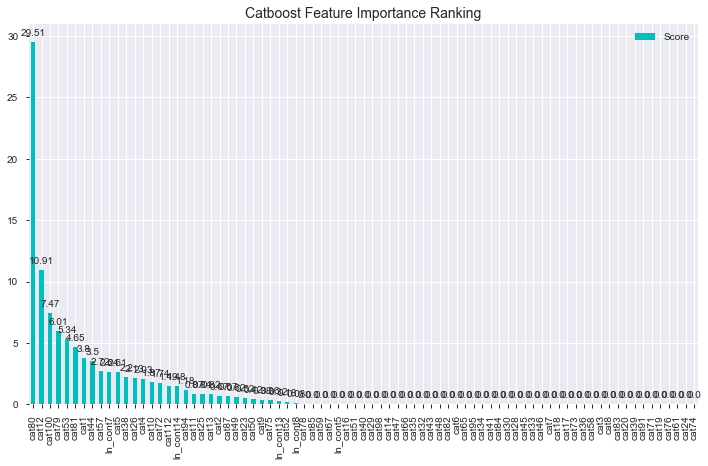

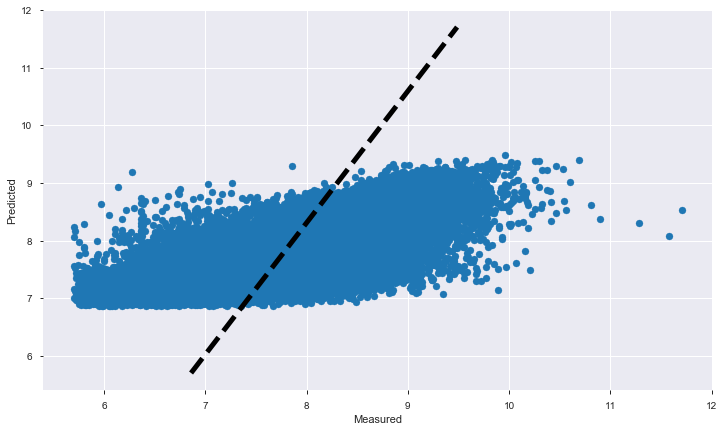

In [195]:
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostRegressor, cv


X = cat_trdataset.drop(['ln_loss'], axis=1)
y = cat_trdataset['ln_loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

X_traint, X_valid, y_traint, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=52)


def perform_model(X_train, y_train,X_valid, y_valid,X_test, y_test):
    model = CatBoostRegressor(
        random_seed = 400,
        loss_function = 'MAE',
        iterations=100,
    )
    
    model.fit(
        X_train, y_train,
        cat_features = categorical_features_indices,
        eval_set=(X_valid, y_valid),
        verbose=False
    )
    
    print("RMSE on training data: "+ model.score(X_train, y_train).astype(str))
    print("RMSE on test data: "+ model.score(X_test, y_test).astype(str))
    
    return model

model=perform_model(X_traint, y_traint, X_valid, y_valid, X_test, y_test)

predictions = model.predict(X_test)
print('R^2 Score = %.2f'%(r2_score(y_test,predictions)))
print('Median Absolute Error = %.2f'%(median_absolute_error(y_test,predictions)))
print('Mean Absolute Error = %.2f'%(mean_absolute_error(y_test,predictions)))
print('Mean Squared Error = %.2f'%(mean_squared_error(y_test,predictions)))

feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')


plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([predictions.min(), predictions.max()], [y_test.min(), y_test.max()], 'k--', lw=5)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

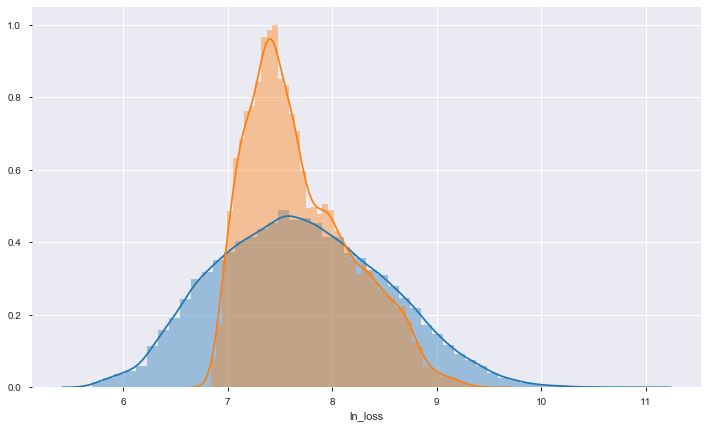

In [37]:
sns.distplot(test_dataset_y)
sns.distplot(predictions)

In [197]:
cat_predictions = model.predict(tsdataset_cat)
cat_predictions

array([7.3670607 , 7.54337086, 8.96503032, ..., 7.52314677, 7.04999277,
       8.38113469])

In [198]:
exp_cat_predictions = np.expm1(cat_predictions)
print(exp_cat_predictions)
test_dataset_predicted_cat = test_dataset.copy()
print(test_dataset_predicted_cat.shape)
test_dataset_predicted_cat['predicted_loss'] = exp_cat_predictions
print(test_dataset_predicted_cat.shape)

[1581.97410137 1887.18411375 7823.61896093 ... 1849.38086998 1151.85040433
 4362.95786663]
(125546, 121)
(125546, 122)


In [213]:
test_dataset_predicted[['id', 'predicted_loss']].to_csv(_path+r'\insurance_prediction.csv', index=False)

In [214]:
test_dataset_predicted_cat[['id','predicted_loss']].to_csv(_path+r'\insurance_prediction_cat_boost.csv', index=False)